# Preprocessing for sales recommendations

## Loading the data

In [1]:
import numpy as np
from mba.data import (
    get_ffp_train_df,
    get_ffp_rollout_df,
    get_reviews_train_df_fpath,
    get_reviews_rollout_df_fpath,
)

In [2]:
raw_tdf = get_ffp_train_df()

In [3]:
raw_tdf

,ID,OTHER_SITE_VALUE,STATUS_PANTINUM,STATUS_GOLD,STATUS_SILVER,NUM_DEAL,LAST_DEAL,ADVANCE_PURCHASE,FARE_L_Y1,FARE_L_Y2,...,POINTS_L_Y1,POINTS_L_Y2,POINTS_L_Y3,POINTS_L_Y4,POINTS_L_Y5,SERVICE_FLAG,CANCEL_FLAG,CREDIT_FLAG,RECSYS_FLAG,BUYER_FLAG
0,1,13.140434,0,0,0,0,0,16,36.8,37.0,...,34.6,47.1,34.7,26.0,42.6,0,0,0,0,0
1,2,9.091326,0,0,0,3,16,18,45.2,47.2,...,50.7,42.9,41.1,50.9,30.4,0,0,0,0,0
2,3,6.742492,0,0,0,5,5,17,29.0,24.8,...,33.9,40.0,37.5,38.5,24.5,0,0,0,0,0
3,4,11.829185,0,0,0,3,14,19,47.8,47.0,...,47.6,57.4,51.5,30.0,31.6,0,0,0,0,0
4,5,7.464712,0,1,0,3,28,26,81.8,81.2,...,81.3,85.2,77.8,82.2,95.4,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39995,39996,7.281724,0,0,0,5,8,22,40.0,37.5,...,20.6,26.3,31.0,24.8,31.9,0,0,0,0,0
39996,39997,3.450719,0,0,0,11,0,14,28.0,36.5,...,42.7,37.0,28.4,27.4,36.8,0,1,0,0,0
39997,39998,7.282398,0,0,0,6,8,12,46.5,44.8,...,38.5,40.2,48.9,48.3,59.8,0,0,0,0,0
39998,39999,7.934329,0,0,1,1,55,30,52.5,56.0,...,71.2,70.8,82.8,60.3,68.7,0,0,0,0,0


## Building the pipeline

In [4]:
from mba.shared import (
    Column,
    NUMERIC_COLUMNS,
    CATEGORICAL_COLUMNS,
    ORDINAL_COLUMNS,
    FeatureGroup,
    FEATURE_GROUPS,
    ContextKey,
)
from mba.pipeline import build_pipeline

In [5]:
pline = build_pipeline()

Starting to build the preprocessing pipeline...
Building the sentiment predictor...
Transformation Pipeline and Model Successfully Loaded
Done.
Building pipeline stages...
Done. Returning pipeline.


In [6]:
pline

A pdpipe pipeline:
[ 0]  Apply dataframe method set_index with kwargs {'keys': 'ID'}
[ 1]  Add the sentiment columns to input dataframes

In [7]:
tdf = pline.fit_transform(
    X=raw_tdf,
    verbose=True,
    context={
        ContextKey.REVIEWS_FPATH: get_reviews_train_df_fpath(),
    },
)

- set_index: Apply dataframe method set_index with kwargs {'keys': 'ID'}
- Add the sentiment columns to input dataframes
  - 1994 id intersection between input & reviewes.
  - None-NA sentiment features adde to 1994 rows.


In [8]:
tdf

,OTHER_SITE_VALUE,STATUS_PANTINUM,STATUS_GOLD,STATUS_SILVER,NUM_DEAL,LAST_DEAL,ADVANCE_PURCHASE,FARE_L_Y1,FARE_L_Y2,FARE_L_Y3,FARE_L_Y4,FARE_L_Y5,POINTS_L_Y1,POINTS_L_Y2,POINTS_L_Y3,POINTS_L_Y4,POINTS_L_Y5,SERVICE_FLAG,CANCEL_FLAG,CREDIT_FLAG,RECSYS_FLAG,BUYER_FLAG,SENTIMENT_0,SENTIMENT_1
ID,,,,,,,,,,,,,,,,,,,,,,,,
1,13.140434,0,0,0,0,0,16,36.8,37.0,37.8,35.0,34.8,34.6,47.1,34.7,26.0,42.6,0,0,0,0,0,0.0,0.0
2,9.091326,0,0,0,3,16,18,45.2,47.2,45.5,44.2,42.8,50.7,42.9,41.1,50.9,30.4,0,0,0,0,0,0.0,0.0
3,6.742492,0,0,0,5,5,17,29.0,24.8,30.8,31.5,29.8,33.9,40.0,37.5,38.5,24.5,0,0,0,0,0,0.0,0.0
4,11.829185,0,0,0,3,14,19,47.8,47.0,45.2,41.0,35.8,47.6,57.4,51.5,30.0,31.6,0,0,0,0,0,0.0,0.0
5,7.464712,0,1,0,3,28,26,81.8,81.2,80.5,82.2,83.5,81.3,85.2,77.8,82.2,95.4,0,1,0,1,0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39996,7.281724,0,0,0,5,8,22,40.0,37.5,29.5,27.2,31.2,20.6,26.3,31.0,24.8,31.9,0,0,0,0,0,0.0,0.0
39997,3.450719,0,0,0,11,0,14,28.0,36.5,32.0,31.2,32.2,42.7,37.0,28.4,27.4,36.8,0,1,0,0,0,0.0,0.0
39998,7.282398,0,0,0,6,8,12,46.5,44.8,45.8,45.2,44.5,38.5,40.2,48.9,48.3,59.8,0,0,0,0,0,0.0,0.0


In [37]:
tdf.BUYER_FLAG.value_counts()

0    36328
1     3672
Name: BUYER_FLAG, dtype: int64

In [38]:
3672 / 36328

0.1010790574763268

## Play with pycaret

In [46]:
from pycaret.classification import (
    setup,
    compare_models,
    create_model,
    tune_model,
    blend_models,
    predict_model,
    finalize_model,
    save_model,
    load_model,
    get_metrics,
    add_metric,
    plot_model,
)
from sklearn.metrics import (
    accuracy_score, roc_auc_score, recall_score, precision_score, f1_score,
    confusion_matrix,
)

In [10]:
from imblearn.over_sampling import RandomOverSampler, SMOTENC

In [11]:
clf_handle = setup(
    data = tdf,
    target = Column.BUYER_FLAG,
    train_size=0.8,
    session_id=42,
    numeric_features=NUMERIC_COLUMNS,
    categorical_features=CATEGORICAL_COLUMNS,
    group_features=[FEATURE_GROUPS[k] for k in FEATURE_GROUPS],
    group_names=[k for k in FEATURE_GROUPS],
    normalize=True,
    remove_perfect_collinearity=True,
    data_split_stratify=True,
    silent=True,
    fix_imbalance=True,
    fix_imbalance_method=RandomOverSampler(),
) 

,Description,Value
0,session_id,42
1,Target,BUYER_FLAG
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(40000, 24)"
5,Missing Values,0
6,Numeric Features,14
7,Categorical Features,9
8,Ordinal Features,0
9,High Cardinality Features,0


In [12]:
TP_REVENUE = 32.7
FP_REVENUE = -6.05
FN_COST = -32.7


def p_count(y_true, y_pred):
    return sum(y_true==1)

def n_count(y_true, y_pred):
    return sum(np.where((y_true==0), 1, 0))

def tp(y_true, y_pred):
    return sum(np.where((y_pred==1) & (y_true==1), 1, 0))

def fp(y_true, y_pred):
    return sum(np.where((y_pred==1) & (y_true==0), 1, 0))

def tn(y_true, y_pred):
    return sum(np.where((y_pred==0) & (y_true==0), 1, 0))

def fn(y_true, y_pred):
    return sum(np.where((y_pred==0) & (y_true==1), 1, 0))

def revenue_score(y_true, y_pred):
    tp_count = tp(y_true, y_pred)
    fp_count = fp(y_true, y_pred)
    return tp_count * TP_REVENUE + fp_count * FP_REVENUE

def opportunity_cost(y_true, y_pred):
    tp_count = tp(y_true, y_pred)
    fp_count = fp(y_true, y_pred)
    fn_count = fn(y_true, y_pred)
    return tp_count * TP_REVENUE + fp_count * FP_REVENUE + fn_count * FN_COST

In [13]:
add_metric(
    id='p_count',
    name='P',
    score_func=p_count,
    target='pred',
    greater_is_better=True,
    multiclass=False,
)
add_metric(
    id='n_count',
    name='N',
    score_func=n_count,
    target='pred',
    greater_is_better=True,
    multiclass=False,
)
add_metric(
    id='revenue_score',
    name='Total Revenue',
    score_func=revenue_score,
    target='pred',
    greater_is_better=True,
    multiclass=False,
)
add_metric(
    id='opportunity_cost',
    name='Opportunity Cost',
    score_func=opportunity_cost,
    target='pred',
    greater_is_better=True,
    multiclass=False,
)
add_metric(
    id='tp',
    name='TP',
    score_func=tp,
    target='pred',
    greater_is_better=True,
    multiclass=False,
)
add_metric(
    id='fp',
    name='FP',
    score_func=fp,
    target='pred',
    greater_is_better=False,
    multiclass=False,
)
add_metric(
    id='tn',
    name='TN',
    score_func=tn,
    target='pred',
    greater_is_better=True,
    multiclass=False,
)
add_metric(
    id='fn',
    name='FN',
    score_func=fn,
    target='pred',
    greater_is_better=False,
    multiclass=False,
)

Name                                                       FN
Display Name                                               FN
Score Function                   <function fn at 0x14c113f70>
Scorer               make_scorer(fn, greater_is_better=False)
Target                                                   pred
Args                                                       {}
Greater is Better                                       False
Multiclass                                              False
Custom                                                   True
Name: fn, dtype: object

In [14]:
top3 = compare_models(n_select=3, sort='revenue_score')

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,P,N,Total Revenue,Opportunity Cost,TP,FP,TN,FN,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.8395,0.7319,0.5589,0.2998,0.3901,0.3073,0.3272,293.8000,2906.2000,3045.5350,-1192.3850,164.2000,384.1000,2522.1000,129.6000,1.1620
gbc,Gradient Boosting Classifier,0.8279,0.7361,0.5844,0.2863,0.3842,0.2976,0.3234,293.8000,2906.2000,3021.5600,-971.1100,171.7000,428.6000,2477.6000,122.1000,5.0270
catboost,CatBoost Classifier,0.8524,0.7269,0.4986,0.3112,0.3829,0.3042,0.3153,293.8000,2906.2000,2824.9050,-1991.8050,146.5000,324.9000,2581.3000,147.3000,5.6870
ada,Ada Boost Classifier,0.8082,0.7339,0.5878,0.2603,0.3606,0.2673,0.2981,293.8000,2906.2000,2666.4550,-1293.5150,172.7000,492.7000,2413.5000,121.1000,1.0890
xgboost,Extreme Gradient Boosting,0.8438,0.7136,0.4711,0.2871,0.3565,0.2737,0.2847,293.8000,2906.2000,2442.6650,-2638.9150,138.4000,344.3000,2561.9000,155.4000,3.8220
lr,Logistic Regression,0.7614,0.7119,0.5579,0.2056,0.3004,0.1920,0.2269,293.8000,2906.2000,1526.2500,-2721.4800,163.9000,633.6000,2272.6000,129.9000,0.8580
ridge,Ridge Classifier,0.7620,0.0000,0.5541,0.2053,0.2995,0.1912,0.2255,293.8000,2906.2000,1508.4300,-2775.2700,162.8000,630.6000,2275.6000,131.0000,0.0440
lda,Linear Discriminant Analysis,0.7622,0.7099,0.5531,0.2053,0.2994,0.1910,0.2252,293.8000,2906.2000,1504.6700,-2788.8400,162.5000,629.6000,2276.6000,131.3000,0.1410
qda,Quadratic Discriminant Analysis,0.8320,0.6943,0.3495,0.2356,0.2772,0.1885,0.1947,293.8000,2906.2000,1261.3600,-4987.6100,102.7000,346.6000,2559.6000,191.1000,0.0860
svm,SVM - Linear Kernel,0.7607,0.0000,0.5150,0.1954,0.2833,0.1732,0.2027,293.8000,2906.2000,1176.5450,-3483.2050,151.3000,623.3000,2282.9000,142.5000,0.2110


In [15]:
def _sanity_check_all_ones_revenue(P, N):
    return P * TP_REVENUE + N * FP_REVENUE

In [16]:
_sanity_check_all_ones_revenue(P = 136 + 157, N=268+2639)

-8006.249999999998

In [17]:
gbc = create_model('gbc')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,P,N,Total Revenue,Opportunity Cost,TP,FP,TN,FN
0,0.8250,0.7296,0.5870,0.2815,0.3805,0.2930,0.3199,293.0000,2907.0000,2968.4500,-988.2500,172.0000,439.0000,2468.0000,121.0000
1,0.8259,0.7130,0.5495,0.2747,0.3663,0.2782,0.3007,293.0000,2907.0000,2693.4500,-1622.9500,161.0000,425.0000,2482.0000,132.0000
2,0.8338,0.7728,0.6054,0.2997,0.4009,0.3169,0.3434,294.0000,2906.0000,3303.8000,-489.4000,178.0000,416.0000,2490.0000,116.0000
3,0.8372,0.7365,0.5816,0.3005,0.3963,0.3131,0.3359,294.0000,2906.0000,3183.8000,-838.3000,171.0000,398.0000,2508.0000,123.0000
4,0.8266,0.7540,0.6122,0.2899,0.3934,0.3070,0.3363,294.0000,2906.0000,3217.9500,-509.8500,180.0000,441.0000,2465.0000,114.0000
5,0.8153,0.7301,0.5748,0.2661,0.3638,0.2725,0.3002,294.0000,2906.0000,2707.0000,-1380.5000,169.0000,466.0000,2440.0000,125.0000
6,0.8141,0.7448,0.5850,0.2667,0.3663,0.2748,0.3040,294.0000,2906.0000,2762.7500,-1226.6500,172.0000,473.0000,2433.0000,122.0000
7,0.8303,0.7070,0.5272,0.2773,0.3634,0.2763,0.2953,294.0000,2906.0000,2624.3000,-1921.0000,155.0000,404.0000,2502.0000,139.0000
8,0.8375,0.7399,0.5782,0.3004,0.3953,0.3122,0.3346,294.0000,2906.0000,3163.2000,-891.6000,170.0000,396.0000,2510.0000,124.0000
9,0.8200,0.7505,0.5986,0.2776,0.3793,0.2902,0.3196,294.0000,2906.0000,2984.3000,-874.3000,176.0000,458.0000,2448.0000,118.0000


In [18]:
gbc_res = predict_model(gbc)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,P,N,Total Revenue,Opportunity Cost,TP,FP,TN,FN
0,Gradient Boosting Classifier,0.8319,0.7452,0.5722,0.2895,0.3844,0.2990,0.3224,734,7266,7496.4500,-2771.3500,420,1031,6235,314


In [19]:
sktuned_gbc = tune_model(
    gbc,
    fold=8,
    n_iter=10,
    optimize='revenue_score',
)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,P,N,Total Revenue,Opportunity Cost,TP,FP,TN,FN
0,0.8430,0.7420,0.5504,0.3038,0.3915,0.3099,0.3280,367.0000,3633.0000,3804.2500,-1591.2500,202.0000,463.0000,3170.0000,165.0000
1,0.8490,0.7530,0.5777,0.3207,0.4125,0.3339,0.3529,367.0000,3633.0000,4215.9500,-852.5500,212.0000,449.0000,3184.0000,155.0000
2,0.8535,0.7339,0.5286,0.3196,0.3984,0.3207,0.3339,367.0000,3633.0000,3845.1500,-1811.9500,194.0000,413.0000,3220.0000,173.0000
3,0.8502,0.7416,0.5804,0.3237,0.4156,0.3376,0.3565,367.0000,3633.0000,4272.8500,-762.9500,213.0000,445.0000,3188.0000,154.0000
4,0.8328,0.7171,0.5504,0.2861,0.3765,0.2909,0.3117,367.0000,3633.0000,3556.2000,-1839.3000,202.0000,504.0000,3129.0000,165.0000
5,0.8388,0.7281,0.5368,0.2932,0.3792,0.2956,0.3135,367.0000,3633.0000,3568.1500,-1990.8500,197.0000,475.0000,3158.0000,170.0000
6,0.8495,0.7154,0.5462,0.3160,0.4004,0.3213,0.3370,368.0000,3632.0000,3940.9500,-1519.9500,201.0000,435.0000,3197.0000,167.0000
7,0.8455,0.7449,0.5734,0.3140,0.4058,0.3256,0.3451,368.0000,3632.0000,4110.6500,-1023.2500,211.0000,461.0000,3171.0000,157.0000
Mean,0.8453,0.7345,0.5555,0.3096,0.3975,0.3169,0.3348,367.2500,3632.7500,3914.2688,-1424.0062,204.0000,455.6250,3177.1250,163.2500
SD,0.0064,0.0126,0.0182,0.0129,0.0134,0.0158,0.0156,0.4330,0.4330,255.8717,447.9983,6.7082,25.4899,25.4187,6.6474


In [20]:
sktuned_gbc

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.0001, loss='deviance', max_depth=9,
                           max_features='sqrt', max_leaf_nodes=None,
                           min_impurity_decrease=0.3, min_impurity_split=None,
                           min_samples_leaf=5, min_samples_split=5,
                           min_weight_fraction_leaf=0.0, n_estimators=260,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=42, subsample=0.35, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [21]:
sktuned_gbc_res = predict_model(sktuned_gbc)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,P,N,Total Revenue,Opportunity Cost,TP,FP,TN,FN
0,Gradient Boosting Classifier,0.8485,0.7396,0.5463,0.3133,0.3982,0.3188,0.3349,734,7266,7794.7500,-3094.3500,401,879,6387,333


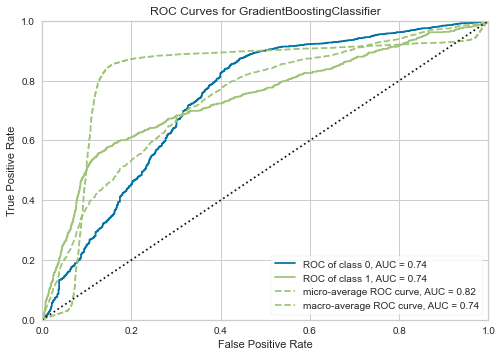

In [47]:
plot_model(sktuned_gbc, plot = 'auc')

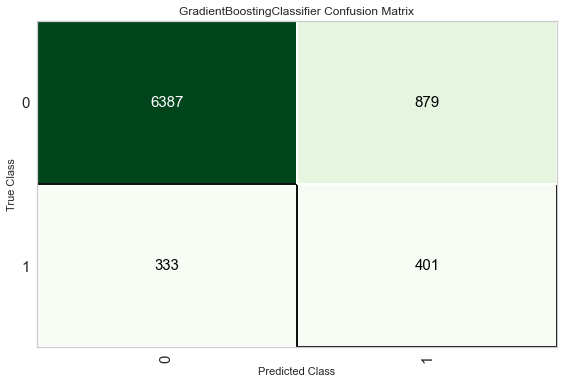

In [49]:
plot_model(sktuned_gbc, plot = 'confusion_matrix')

## AdaBoost

In [22]:
ada = create_model('ada')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,P,N,Total Revenue,Opportunity Cost,TP,FP,TN,FN
0,0.8084,0.7360,0.5870,0.2590,0.3595,0.2662,0.2971,293.0000,2907.0000,2647.8000,-1308.9000,172.0000,492.0000,2415.0000,121.0000
1,0.7931,0.7165,0.5529,0.2338,0.3286,0.2294,0.2592,293.0000,2907.0000,2084.8500,-2198.8500,162.0000,531.0000,2376.0000,131.0000
2,0.8288,0.7698,0.6156,0.2938,0.3978,0.3123,0.3414,294.0000,2906.0000,3286.9500,-408.1500,181.0000,435.0000,2471.0000,113.0000
3,0.8166,0.7382,0.5952,0.2722,0.3735,0.2831,0.3130,294.0000,2906.0000,2891.1000,-1000.2000,175.0000,468.0000,2438.0000,119.0000
4,0.8075,0.7514,0.6259,0.2667,0.3740,0.2814,0.3173,294.0000,2906.0000,2955.5000,-641.5000,184.0000,506.0000,2400.0000,110.0000
5,0.8112,0.7229,0.5680,0.2593,0.3561,0.2631,0.2910,294.0000,2906.0000,2575.0500,-1577.8500,167.0000,477.0000,2429.0000,127.0000
6,0.7947,0.7206,0.5850,0.2433,0.3437,0.2458,0.2791,294.0000,2906.0000,2387.6500,-1601.7500,172.0000,535.0000,2371.0000,122.0000
7,0.8153,0.7221,0.5544,0.2616,0.3555,0.2636,0.2890,294.0000,2906.0000,2547.1000,-1736.6000,163.0000,460.0000,2446.0000,131.0000
8,0.8156,0.7361,0.5986,0.2716,0.3737,0.2830,0.3135,294.0000,2906.0000,2899.6000,-959.0000,176.0000,472.0000,2434.0000,118.0000
9,0.8025,0.7318,0.5884,0.2529,0.3538,0.2585,0.2907,294.0000,2906.0000,2565.5500,-1391.1500,173.0000,511.0000,2395.0000,121.0000


In [23]:
ada_res = predict_model(ada)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,P,N,Total Revenue,Opportunity Cost,TP,FP,TN,FN
0,Ada Boost Classifier,0.8111,0.7397,0.5831,0.2621,0.3616,0.2691,0.2988,734,7266,6705.3500,-3300.8500,428,1205,6061,306


In [24]:
sktuned_ada = tune_model(
    ada,
    fold=10,
    n_iter=15,
    optimize='revenue_score',
)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,P,N,Total Revenue,Opportunity Cost,TP,FP,TN,FN
0,0.8109,0.7345,0.5973,0.2644,0.3665,0.2744,0.3060,293.0000,2907.0000,2776.1500,-1082.4500,175.0000,487.0000,2420.0000,118.0000
1,0.8078,0.7181,0.5563,0.2515,0.3464,0.2521,0.2795,293.0000,2907.0000,2395.8500,-1855.1500,163.0000,485.0000,2422.0000,130.0000
2,0.8200,0.7669,0.6361,0.2851,0.3937,0.3056,0.3396,294.0000,2906.0000,3277.4500,-221.4500,187.0000,469.0000,2437.0000,107.0000
3,0.8200,0.7351,0.5952,0.2769,0.3780,0.2888,0.3178,294.0000,2906.0000,2957.6500,-933.6500,175.0000,457.0000,2449.0000,119.0000
4,0.8103,0.7631,0.6224,0.2695,0.3762,0.2844,0.3192,294.0000,2906.0000,2983.3000,-646.4000,183.0000,496.0000,2410.0000,111.0000
5,0.8050,0.7308,0.5850,0.2552,0.3554,0.2608,0.2921,294.0000,2906.0000,2587.3000,-1402.1000,172.0000,502.0000,2404.0000,122.0000
6,0.7981,0.7322,0.5986,0.2500,0.3527,0.2563,0.2907,294.0000,2906.0000,2560.8000,-1297.8000,176.0000,528.0000,2378.0000,118.0000
7,0.8219,0.7247,0.5544,0.2708,0.3638,0.2742,0.2981,294.0000,2906.0000,2674.1500,-1609.5500,163.0000,439.0000,2467.0000,131.0000
8,0.8244,0.7301,0.6020,0.2846,0.3865,0.2990,0.3277,294.0000,2906.0000,3095.6500,-730.2500,177.0000,445.0000,2461.0000,117.0000
9,0.8091,0.7543,0.6020,0.2638,0.3668,0.2741,0.3066,294.0000,2906.0000,2799.2000,-1026.7000,177.0000,494.0000,2412.0000,117.0000


In [25]:
sktuned_ada

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=0.15,
                   n_estimators=110, random_state=42)

In [26]:
sktuned_ada_res = predict_model(sktuned_ada)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,P,N,Total Revenue,Opportunity Cost,TP,FP,TN,FN
0,Ada Boost Classifier,0.8166,0.7523,0.5872,0.2702,0.3701,0.2796,0.3085,734,7266,7051.5000,-2856.6000,431,1164,6102,303


## LGBM

In [27]:
lgbm = create_model('lightgbm')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,P,N,Total Revenue,Opportunity Cost,TP,FP,TN,FN
0,0.8366,0.7321,0.5597,0.2939,0.3854,0.3016,0.3224,293.0000,2907.0000,2979.1000,-1239.2000,164.0000,394.0000,2513.0000,129.0000
1,0.8412,0.7198,0.5085,0.2904,0.3697,0.2866,0.3013,293.0000,2907.0000,2670.1000,-2038.7000,149.0000,364.0000,2543.0000,144.0000
2,0.8494,0.7644,0.5816,0.3226,0.4150,0.3366,0.3559,294.0000,2906.0000,3419.7500,-602.3500,171.0000,359.0000,2547.0000,123.0000
3,0.8469,0.7334,0.5544,0.3123,0.3995,0.3195,0.3369,294.0000,2906.0000,3158.1500,-1125.5500,163.0000,359.0000,2547.0000,131.0000
4,0.8412,0.7435,0.5884,0.3089,0.4052,0.3237,0.3461,294.0000,2906.0000,3315.7500,-640.9500,173.0000,387.0000,2519.0000,121.0000
5,0.8334,0.7248,0.5476,0.2870,0.3766,0.2911,0.3114,294.0000,2906.0000,2844.7000,-1504.4000,161.0000,400.0000,2506.0000,133.0000
6,0.8309,0.7327,0.5714,0.2882,0.3831,0.2973,0.3207,294.0000,2906.0000,2982.8500,-1137.3500,168.0000,415.0000,2491.0000,126.0000
7,0.8403,0.7006,0.5034,0.2885,0.3668,0.2830,0.2974,294.0000,2906.0000,2631.3500,-2142.8500,148.0000,365.0000,2541.0000,146.0000
8,0.8512,0.7413,0.5680,0.3236,0.4123,0.3344,0.3518,294.0000,2906.0000,3349.4500,-803.4500,167.0000,349.0000,2557.0000,127.0000
9,0.8356,0.7421,0.5782,0.2972,0.3926,0.3087,0.3316,294.0000,2906.0000,3126.9000,-927.9000,170.0000,402.0000,2504.0000,124.0000


In [28]:
lgbm_res = predict_model(lgbm)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,P,N,Total Revenue,Opportunity Cost,TP,FP,TN,FN
0,Light Gradient Boosting Machine,0.8419,0.7418,0.5531,0.3023,0.3909,0.3090,0.3276,734,7266,7607.3500,-3118.2500,406,937,6329,328


In [29]:
sktuned_lgbm = tune_model(
    lgbm,
    fold=10,
    n_iter=10,
    optimize='revenue_score',
)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,P,N,Total Revenue,Opportunity Cost,TP,FP,TN,FN
0,0.8362,0.7447,0.5666,0.2948,0.3879,0.3040,0.3257,293.0000,2907.0000,3026.3500,-1126.5500,166.0000,397.0000,2510.0000,127.0000
1,0.8400,0.7216,0.5324,0.2938,0.3786,0.2955,0.3127,293.0000,2907.0000,2832.4500,-1647.4500,156.0000,375.0000,2532.0000,137.0000
2,0.8438,0.7588,0.5884,0.3134,0.4090,0.3285,0.3502,294.0000,2906.0000,3364.1500,-592.5500,173.0000,379.0000,2527.0000,121.0000
3,0.8394,0.7203,0.5714,0.3022,0.3953,0.3127,0.3338,294.0000,2906.0000,3146.2000,-974.0000,168.0000,388.0000,2518.0000,126.0000
4,0.8412,0.7498,0.5952,0.3103,0.4079,0.3266,0.3498,294.0000,2906.0000,3369.0500,-522.2500,175.0000,389.0000,2517.0000,119.0000
5,0.8278,0.7180,0.5646,0.2818,0.3760,0.2888,0.3124,294.0000,2906.0000,2869.0500,-1316.5500,166.0000,423.0000,2483.0000,128.0000
6,0.8288,0.7346,0.5782,0.2862,0.3829,0.2964,0.3212,294.0000,2906.0000,2993.8000,-1061.0000,170.0000,424.0000,2482.0000,124.0000
7,0.8397,0.7151,0.5238,0.2922,0.3752,0.2916,0.3080,294.0000,2906.0000,2779.1500,-1798.8500,154.0000,373.0000,2533.0000,140.0000
8,0.8497,0.7401,0.5680,0.3205,0.4098,0.3313,0.3491,294.0000,2906.0000,3319.2000,-833.7000,167.0000,354.0000,2552.0000,127.0000
9,0.8328,0.7406,0.5850,0.2940,0.3914,0.3066,0.3310,294.0000,2906.0000,3125.7500,-863.6500,172.0000,413.0000,2493.0000,122.0000


In [30]:
sktuned_lgbm_res = predict_model(sktuned_lgbm)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,P,N,Total Revenue,Opportunity Cost,TP,FP,TN,FN
0,Light Gradient Boosting Machine,0.8422,0.7441,0.5572,0.3039,0.3933,0.3115,0.3305,734,7266,7705.4500,-2922.0500,409,937,6329,325


## Catboost

In [43]:
catboost = top3[2]
catboost

In [44]:
sktuned_cat = tune_model(
    catboost,
    fold=10,
    n_iter=10,
    optimize='revenue_score',
)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,P,N,Total Revenue,Opportunity Cost,TP,FP,TN,FN
0,0.8266,0.7373,0.5904,0.2845,0.3840,0.2972,0.3241,293.0000,2907.0000,3025.3500,-898.6500,173.0000,435.0000,2472.0000,120.0000
1,0.8256,0.7294,0.5563,0.2758,0.3688,0.2807,0.3040,293.0000,2907.0000,2740.7000,-1510.3000,163.0000,428.0000,2479.0000,130.0000
2,0.8403,0.7681,0.6088,0.3113,0.4120,0.3306,0.3555,294.0000,2906.0000,3457.5000,-303.0000,179.0000,396.0000,2510.0000,115.0000
3,0.8431,0.7432,0.5986,0.3143,0.4122,0.3316,0.3546,294.0000,2906.0000,3432.0000,-426.6000,176.0000,384.0000,2522.0000,118.0000
4,0.8328,0.7550,0.6190,0.3008,0.4049,0.3209,0.3493,294.0000,2906.0000,3392.2500,-270.1500,182.0000,423.0000,2483.0000,112.0000
5,0.8219,0.7332,0.5782,0.2760,0.3736,0.2846,0.3112,294.0000,2906.0000,2860.7000,-1194.1000,170.0000,446.0000,2460.0000,124.0000
6,0.8222,0.7404,0.5816,0.2771,0.3754,0.2866,0.3135,294.0000,2906.0000,2893.4000,-1128.7000,171.0000,446.0000,2460.0000,123.0000
7,0.8338,0.7158,0.5204,0.2812,0.3652,0.2792,0.2967,294.0000,2906.0000,2637.5500,-1973.1500,153.0000,391.0000,2515.0000,141.0000
8,0.8391,0.7337,0.5782,0.3030,0.3977,0.3151,0.3370,294.0000,2906.0000,3193.4500,-861.3500,170.0000,391.0000,2515.0000,124.0000
9,0.8244,0.7515,0.6020,0.2846,0.3865,0.2990,0.3277,294.0000,2906.0000,3095.6500,-730.2500,177.0000,445.0000,2461.0000,117.0000


In [ ]:
# sktuned_cat_res = predict_model(sktuned_cat)

## Blending models

In [31]:
blender_top3 = blend_models(top3)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,P,N,Total Revenue,Opportunity Cost,TP,FP,TN,FN
0,0.8459,0.7425,0.5461,0.3077,0.3936,0.3132,0.3301,293.0000,2907.0000,3054.0000,-1295.1000,160.0000,360.0000,2547.0000,133.0000
1,0.8459,0.7112,0.5085,0.2992,0.3767,0.2955,0.3091,293.0000,2907.0000,2760.8500,-1947.9500,149.0000,349.0000,2558.0000,144.0000
2,0.8528,0.7684,0.5782,0.3288,0.4192,0.3422,0.3601,294.0000,2906.0000,3459.6500,-595.1500,170.0000,347.0000,2559.0000,124.0000
3,0.8556,0.7396,0.5578,0.3306,0.4152,0.3389,0.3540,294.0000,2906.0000,3354.2000,-896.8000,164.0000,332.0000,2574.0000,130.0000
4,0.8431,0.7448,0.5680,0.3081,0.3995,0.3183,0.3381,294.0000,2906.0000,3192.1500,-960.7500,167.0000,375.0000,2531.0000,127.0000
5,0.8353,0.7210,0.5442,0.2893,0.3778,0.2930,0.3125,294.0000,2906.0000,2854.3500,-1527.4500,160.0000,393.0000,2513.0000,134.0000
6,0.8366,0.7394,0.5612,0.2952,0.3869,0.3029,0.3238,294.0000,2906.0000,3011.8000,-1206.5000,165.0000,394.0000,2512.0000,129.0000
7,0.8469,0.7134,0.5000,0.3000,0.3750,0.2939,0.3064,294.0000,2906.0000,2731.7500,-2075.1500,147.0000,343.0000,2563.0000,147.0000
8,0.8556,0.7391,0.5476,0.3286,0.4107,0.3343,0.3484,294.0000,2906.0000,3274.2500,-1074.8500,161.0000,329.0000,2577.0000,133.0000
9,0.8447,0.7457,0.5714,0.3117,0.4034,0.3229,0.3425,294.0000,2906.0000,3249.0500,-871.1500,168.0000,371.0000,2535.0000,126.0000


In [35]:
blender_top3

VotingClassifier(estimators=[('lightgbm',
                              LGBMClassifier(boosting_type='gbdt',
                                             class_weight=None,
                                             colsample_bytree=1.0,
                                             importance_type='split',
                                             learning_rate=0.1, max_depth=-1,
                                             min_child_samples=20,
                                             min_child_weight=0.001,
                                             min_split_gain=0.0,
                                             n_estimators=100, n_jobs=-1,
                                             num_leaves=31, objective=None,
                                             random_state=42, reg_alpha=0.0,
                                             reg_lambda=0.0, silent='warn',
                                             s...
                                                         m

In [32]:
blender_res = predict_model(blender_top3)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,P,N,Total Revenue,Opportunity Cost,TP,FP,TN,FN
0,Voting Classifier,0.8499,0.7452,0.5409,0.3148,0.3980,0.3190,0.3343,734,7266,7754.7000,-3265.2000,397,864,6402,337


In [33]:
blender_res

,OTHER_SITE_VALUE,NUM_DEAL,LAST_DEAL,ADVANCE_PURCHASE,FARE_L_Y1,FARE_L_Y2,FARE_L_Y3,FARE_L_Y4,FARE_L_Y5,POINTS_L_Y1,...,STATUS_SILVER_0,SERVICE_FLAG_0,CANCEL_FLAG_0,CREDIT_FLAG_1,RECSYS_FLAG_1,SENTIMENT_0_1.0,SENTIMENT_1_1.0,BUYER_FLAG,Label,Score
0,0.810761,-0.500711,-0.083284,-0.145404,-0.821989,-1.067224,-0.822561,-0.607190,-0.348481,-1.809945,...,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0,0,0.8071
1,0.478291,-0.999831,0.256552,-0.145404,-0.728102,-0.824952,-1.064752,-1.245478,-0.872001,-0.659535,...,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0,0,0.7688
2,0.655939,-0.999831,1.955734,0.278997,1.860490,1.961184,2.029913,1.979557,1.879834,1.819185,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0,0,0.7210
3,-1.223001,-0.500711,-0.338161,-0.569805,-0.151369,-0.528841,-0.640917,-0.593752,-0.804883,-0.143629,...,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0,0,0.7255
4,-0.158672,-0.001591,-0.508079,-0.782005,-0.661040,-0.609598,-0.741830,-0.842349,-0.858578,-0.695115,...,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0,0,0.7969
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7995,-1.188774,-1.498951,1.530939,-0.782005,-0.821989,-0.878790,-0.889836,-0.707973,-0.704206,-0.410477,...,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0,0,0.8101
7996,-2.140656,-0.500711,0.086634,-0.569805,0.029698,0.117220,-0.015257,-0.015934,-0.053162,-0.280018,...,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0,0,0.7620
7997,0.421767,-0.001591,-0.593038,-0.357604,-1.090236,-0.946088,-0.943656,-0.996882,-0.939119,-0.297808,...,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0,0,0.8374
7998,-1.315843,1.994890,-0.762956,-0.145404,0.116879,0.231626,0.099111,0.165475,0.235445,-0.683255,...,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0,0,0.5870


## Tuning with optuna

In [36]:
tuned_gbc = tune_model(
    gbc,
    fold=8,
    n_iter=8,
    optimize='revenue_score',
    search_library='optuna',
    early_stopping='Hyperband',
)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,P,N,Total Revenue,Opportunity Cost,TP,FP,TN,FN
0,0.8398,0.7432,0.5477,0.2973,0.3854,0.3025,0.3212,367.0000,3633.0000,3698.9500,-1729.2500,201.0000,475.0000,3158.0000,166.0000
1,0.8488,0.7502,0.5749,0.3197,0.4109,0.3321,0.3510,367.0000,3633.0000,4183.2500,-917.9500,211.0000,449.0000,3184.0000,156.0000
2,0.8485,0.7324,0.5368,0.3112,0.3940,0.3144,0.3296,367.0000,3633.0000,3804.1000,-1754.9000,197.0000,436.0000,3197.0000,170.0000
3,0.8448,0.7537,0.5804,0.3132,0.4069,0.3266,0.3472,367.0000,3633.0000,4139.7500,-896.0500,213.0000,467.0000,3166.0000,154.0000
4,0.8285,0.7168,0.5613,0.2818,0.3752,0.2883,0.3113,367.0000,3633.0000,3559.9500,-1704.7500,206.0000,525.0000,3108.0000,161.0000
5,0.8335,0.7330,0.5450,0.2861,0.3752,0.2898,0.3098,367.0000,3633.0000,3521.0500,-1939.8500,200.0000,499.0000,3134.0000,167.0000
6,0.8460,0.7172,0.5543,0.3110,0.3984,0.3181,0.3356,368.0000,3632.0000,3936.2000,-1426.6000,204.0000,452.0000,3180.0000,164.0000
7,0.8432,0.7574,0.5870,0.3126,0.4079,0.3271,0.3488,368.0000,3632.0000,4189.4500,-780.9500,216.0000,475.0000,3157.0000,152.0000
Mean,0.8416,0.7380,0.5609,0.3041,0.3943,0.3124,0.3318,367.2500,3632.7500,3879.0875,-1393.7875,206.0000,472.2500,3160.5000,161.2500
SD,0.0068,0.0147,0.0170,0.0131,0.0134,0.0160,0.0155,0.4330,0.4330,256.9433,431.3684,6.3246,26.9386,26.8608,6.1796


In [39]:
tuned_gbc

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=1.022298343907294e-06, loss='deviance',
                           max_depth=8, max_features=0.4181008035150522,
                           max_leaf_nodes=None,
                           min_impurity_decrease=4.353242697293664e-09,
                           min_impurity_split=None, min_samples_leaf=5,
                           min_samples_split=4, min_weight_fraction_leaf=0.0,
                           n_estimators=116, n_iter_no_change=None,
                           presort='deprecated', random_state=42,
                           subsample=0.42473269463389596, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [40]:
tuned_gbc_res = predict_model(tuned_gbc)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,P,N,Total Revenue,Opportunity Cost,TP,FP,TN,FN
0,Gradient Boosting Classifier,0.8445,0.7387,0.5545,0.3074,0.3955,0.3146,0.3327,734,7266,7761.0500,-2931.8500,407,917,6349,327
